# 확률적 경사 하강법

확률적 경사하강법(Stochastic Gradient Descent, SGD)은 기계 학습에서 많이 사용되는 최적화 알고리즘 중 하나입니다. 이 알고리즘은 주어진 데이터와 모델을 이용하여 모델의 파라미터를 최적화하는 방법이다.

확률적 경사하강법은 우리가 가지고 있는 데이터를 사용하여 모델을 학습시키는 과정으로. 학습 과정에서 모델의 파라미터를 조정하여 입력 데이터와 실제 결과 사이의 오차를 최소화하는 것이다.

확률적 경사하강법은 "경사하강법"이라는 개념을 기반으로 하고 경사하강법은 함수의 기울기를 따라서 함수의 최솟값을 찾아가는 방법이다. 예를들어 함수의 현재 위치에서 기울기를 계산하고, 그 기울기의 반대 방향으로 조금씩 이동하여 최솟값을 찾아가는 것이다.

확률적 경사하강법은 경사하강법을 조금 변형한 방식으로 전체 데이터를 사용하는 것이 아니라 데이터의 일부를 무작위로 선택하여 그 일부에 대한 기울기를 계산하고 모델을 업데이트하고 이것을 반복하여 전체 데이터에 대한 학습을 수행하여
전체 데이터를 사용하지 않고도 모델을 학습할 수 있어 계산 비용을 줄일 수 있고 데이터를 무작위로 선택하기 때문에 모델이 다양한 데이터에 노출되어 일반화 성능을 향상시킬 수도 있다.

장점: 계산 비용이 적고 대규모 데이터에 적용하기에 효과적이다.

단점: 무작위 선택으로 인해 일부 데이터가 누락될 수 있고 수렴하는데 시간이 더 걸릴 수 있다.

  예를 들어, 손글씨 숫자를 인식하는 모델을 만드려할때
확률적 경사하강법을 사용하여 모델을 학습시키면 선택한 일부 손글씨 데이터에 대한 기울기를 계산하고 모델을 업데이트하고 
이를 반복하여 모델을 개선하고 최종적으로 숫자를 잘 인식하는 모델을 얻을 수 있다.

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/4-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## SGDClassifier

In [ ]:
import pandas as pd                   

fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()
#Species열을 제외하고 나머지 5개는 입력데이터에 사용

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)
#훈련,테스트세트 나누기

In [ ]:
from sklearn.preprocessing import StandardScaler
#표준화 전처리
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import SGDClassifier
#SGDClassifier는 사이킷런에서 경사하강법을 사용하는 대표적분류클래스다.

In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
#SGDClassifier는 2개의 매개변수를 지정, loss=='log'로 로지스틱 손실함수를 지정.max_iter은 에포크횟수를 지정
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
sc.partial_fit(train_scaled, train_target)
#partial_fit()메서드를 호출후 훈련,테스트 세트의 점수를 확
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


## 에포크와 과대/과소적합

과소적합: 모델이 훈련 데이터에 대해 너무 단순하거나 제대로 학습하지 못하여 훈련 데이터와 테스트 데이터 모두에서 좋은 성능을 내지 못하는 상황.
과소적합된 모델은 훈련 데이터의 패턴을 충분히 학습하지 못하고 복잡한 패턴이나 관계를 잡아내지 못하는 경향이 있음.
이는 모델이 너무 단순하거나 훈련 데이터가 적거나 다양성이 부족한 경우에 발생할 수 있습니다.

과대적합: 모델이 훈련 데이터에 너무 과도하게 학습되어 훈련 데이터에는 높은 성능을 보이지만 새로운 데이터나 테스트 데이터에서는 성능이 저하되는 상황을 말함.
과대적합된 모델은 훈련 데이터에 너무 맞춰져서 노이즈나 이상치까지 학습하여 일반화 능력이 떨어짐.모델이 훈련 데이터에 지나치게 복잡하게 맞춰져 있는 경우나 훈련 데이터가 많은 경우에 발생할 수 있음.

과소적합과 과대적합은 모델의 성능과 일반화 능력에 직접적인 영향을 미치기 때문에 적절한 모델 복잡도와 데이터의 다양성을 고려하여 이를 해결하는 것이 중요합니다.

조기 종료 :머신러닝 모델의 학습을 일찍 종료하는 방법. 학습이 계속될수록 모델은 훈련 데이터에 과도하게 적합화될 수 있고 이는 과대적합이 될수있다.

조기 종료는 모델이 훈련 데이터에 대해 과도하게 학습되기 전에 학습을 중단하여 과대적합을 방지하는 방법으로 모델의 성능을 모니터링하고 성능이 일정 기간 동안 향상되지 않을 경우 학습을 종료함. 주로 검증 데이터를 사용하여 모델의 성능을 평가하고 검증 데이터의 성능이 일정 기간 동안 향상되지 않을 때 학습을 중단.

조기 종료는 모델이 훈련 데이터에 과대적합되는 것을 방지하고 일반화 성능을 향상시킬 수 있으며 학습 시간과 자원을 절약할 수 있어 효율적인 모델 학습을 가능하게 함.






In [ ]:
#train_target에 있는 7개 생선의 목록을 만든다
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [ ]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))
#300번의 에포크동안 반복훈련. 반복마다 훈련세트와 테스트세트의 점수를 계산해  train_score, test_score리스트에 추가.

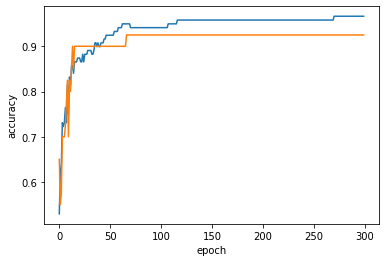

In [ ]:
import matplotlib.pyplot as plt
#300번의 에포크동안의기록한 점수그래프 그리기
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')  
plt.ylabel('accuracy')
plt.show()

In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
#과소적합이 생겨 반복횟수를 100에 맞추고 다시훈련
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


힌지 손실: 서포트 벡터 머신 알고리즘에서 사용되는 손실 함수로 서포트 벡터 머신은 분류 및 회귀 문제에 사용되며 주로 분류 문제에 적용될 때 힌지 손실을 최소화하는 결정 경계를 찾는다.

힌지 손실은 주어진 데이터 포인트와 결정 경계 사이의 여백을 기반으로 하며 여백은 결정 경계와 가장 가까운 데이터 포인트 사이의 거리를 의미함. 힌지 손실은 올바른 클래스의 여백을 최대화하고 잘못된 클래스의 여백을 최소화하는 방향으로 모델을 학습한다.

서포트 벡터 머신의 핵심 개념은 서포트 벡터다. 서포트 벡터는 결정 경계와 가장 가까운 데이터 포인트들을 의미합니다. 이러한 서포트 벡터들이 모델의 학습과 예측에 중요한 역할을 한다.

서포트 벡터 머신의 학습 과정:

-데이터를 특징 벡터와 클래스 레이블로 준비.

-결정 경계와 여백을 최적화하는 문제로 변환.

-힌지 손실을 최소화하는 결정 경계를 찾기 위해 최적화 알고리즘을 사용하여 모델을 학습.

-결정 경계와 여백을 기반으로 새로운 데이터 포인트의 클래스를 예측.

서포트 벡터 머신은 분류 문제에서 좋은 성능을 발휘하며 일반화 능력이 높은 모델을 만들 수 있다.

In [ ]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
#힌지손실을 사용해 반복횟수동안 모델훈련
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
